In [160]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

# I. data importation and wrangling

In [161]:
raw_df = pd.read_csv('../final.csv')

In [162]:
print(raw_df.shape)
raw_df.head()

(199, 74)


,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
0,Jul-17,20980.32206,23.12607,3.44655,0.0,9653.23988,111.09914,1648.012,4371.98080,5008.53970,...,53.572,3.694,57.266,1051.503,2111.264,17.53,5.424,70676.525,24342.39981,48.016
1,Jun-17,18260.48619,26.82868,3.31392,0.0,7191.91812,118.54188,959.831,4455.83824,5388.18090,...,47.968,3.560,51.529,834.144,1890.416,17.55,6.162,52936.269,22235.30692,55.518
2,May-17,16878.55820,14.41477,3.32468,0.0,5243.68841,136.91117,840.135,4972.12223,5532.79051,...,47.874,3.679,51.553,697.129,1886.702,15.46,3.572,38705.087,19838.08134,39.540
3,Apr-17,15436.06640,19.33808,3.53045,0.0,4248.56449,129.62659,1412.868,4397.51087,5155.78836,...,48.577,3.560,52.137,613.895,1914.399,13.12,4.529,30739.269,17875.54180,43.499
4,Mar-17,16101.84657,27.06185,6.00000,0.0,4816.73759,118.23473,1569.141,4481.18059,5062.00859,...,63.788,3.679,67.466,667.123,2513.842,15.39,6.222,36072.471,19947.97958,55.854


In [163]:
# a function to modify the format of the date 
def modify_data(s):
    if len(s)==6:
        s = s[:4]+'20'+s[4:]
    else:
        s = s[:4]+'200'+s[4:]
    return(s)

In [164]:
df = raw_df
df['Month'] = df['Month'].apply(modify_data)
df.head()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
0,Jul-2017,20980.32206,23.12607,3.44655,0.0,9653.23988,111.09914,1648.012,4371.98080,5008.53970,...,53.572,3.694,57.266,1051.503,2111.264,17.53,5.424,70676.525,24342.39981,48.016
1,Jun-2017,18260.48619,26.82868,3.31392,0.0,7191.91812,118.54188,959.831,4455.83824,5388.18090,...,47.968,3.560,51.529,834.144,1890.416,17.55,6.162,52936.269,22235.30692,55.518
2,May-2017,16878.55820,14.41477,3.32468,0.0,5243.68841,136.91117,840.135,4972.12223,5532.79051,...,47.874,3.679,51.553,697.129,1886.702,15.46,3.572,38705.087,19838.08134,39.540
3,Apr-2017,15436.06640,19.33808,3.53045,0.0,4248.56449,129.62659,1412.868,4397.51087,5155.78836,...,48.577,3.560,52.137,613.895,1914.399,13.12,4.529,30739.269,17875.54180,43.499
4,Mar-2017,16101.84657,27.06185,6.00000,0.0,4816.73759,118.23473,1569.141,4481.18059,5062.00859,...,63.788,3.679,67.466,667.123,2513.842,15.39,6.222,36072.471,19947.97958,55.854


In [165]:
df['Month'] = pd.to_datetime(df['Month'])

In [166]:
df.head()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
0,2017-07-01,20980.32206,23.12607,3.44655,0.0,9653.23988,111.09914,1648.012,4371.98080,5008.53970,...,53.572,3.694,57.266,1051.503,2111.264,17.53,5.424,70676.525,24342.39981,48.016
1,2017-06-01,18260.48619,26.82868,3.31392,0.0,7191.91812,118.54188,959.831,4455.83824,5388.18090,...,47.968,3.560,51.529,834.144,1890.416,17.55,6.162,52936.269,22235.30692,55.518
2,2017-05-01,16878.55820,14.41477,3.32468,0.0,5243.68841,136.91117,840.135,4972.12223,5532.79051,...,47.874,3.679,51.553,697.129,1886.702,15.46,3.572,38705.087,19838.08134,39.540
3,2017-04-01,15436.06640,19.33808,3.53045,0.0,4248.56449,129.62659,1412.868,4397.51087,5155.78836,...,48.577,3.560,52.137,613.895,1914.399,13.12,4.529,30739.269,17875.54180,43.499
4,2017-03-01,16101.84657,27.06185,6.00000,0.0,4816.73759,118.23473,1569.141,4481.18059,5062.00859,...,63.788,3.679,67.466,667.123,2513.842,15.39,6.222,36072.471,19947.97958,55.854


In [167]:
y = df['Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.']

In [168]:
df.drop(['Month'], axis=1).columns.values

array(['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours',
       'GenCalifornia...coal.thousand.megawatthours',
       'GenCalifornia...petroleum.liquids.thousand.megawatthours',
       'GenCalifornia...petroleum.coke.thousand.megawatthours',
       'GenCalifornia...natural.gas.thousand.megawatthours',
       'GenCalifornia...other.gases.thousand.megawatthours',
       'GenCalifornia...nuclear.thousand.megawatthours',
       'GenCalifornia...conventional.hydroelectric.thousand.megawatthours',
       'GenCalifornia...other.renewables.thousand.megawatthours',
       'GenCalifornia...hydro.electric.pumped.storage.thousand.megawatthours',
       'GenCalifornia...other.thousand.megawatthours',
       'GenCalifornia..Geothermal.electricity.Total',
       'GenCalifornia..Geothermal.electric.utility',
       'GenCalifornia..Independent.Power.producers', 'GDP', 'Av.Temp',
       'Av.Daily.Max', 'Av.Rel.Humid',
       'PrCalifornia...all.sectors.cents.per.kilowatthour',
       '

# II. Feature Selection

In [169]:
from scipy.stats import pearsonr
df_new = df.drop(['Month',
                  'Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes.',
                  'Average.Retail.Price.of.Electricity..Commercial..Cents.per.Kilowatthour...Including.Taxes.',
                  'Average.Retail.Price.of.Electricity..Industrial..Cents.per.Kilowatthour...Including.Taxes.',
                  'Average.Retail.Price.of.Electricity..Transportation..Cents.per.Kilowatthour...Including.Taxes.',
                  'Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.'], axis=1)
Feature = df_new.columns.values
Pearson = []
for var in df_new.columns.values:
    Pearson = Pearson + [abs(pearsonr(y,df[var])[0])]
Pearson_Coef = pd.DataFrame({'Feature': Feature, 'Pearson':Pearson}) 
Pearson_Coef = Pearson_Coef[Pearson_Coef['Pearson'] >= 0.8].sort_values(ascending=False,axis=0, by = 'Pearson')
Pearson_Coef

,Feature,Pearson
28,Biofuels.Consump.TrillBTU.,0.923888
29,Total.Biomass.Consump.TrillBTU.,0.918654
19,Bio.Prod.Trillion.BTU.,0.914748
20,BioMass.Prod.Trill.BTU.,0.910235
59,Natural.Gas.Consumed.by.the.Transportation.Sec...,0.859504
14,GDP,0.849559
23,GeoConsump.TrillBtu.,0.843676
10,GenCalifornia...other.thousand.megawatthours,0.826934
30,Total.Renewable.Consump.TrillBTU.,0.816141
21,Total.RenProd..TrillBtu.,0.812076


In [170]:
df_new = df[list(Pearson_Coef.Feature)]
print(df_new.shape)
df_new.head()

(199, 11)


,Biofuels.Consump.TrillBTU.,Total.Biomass.Consump.TrillBTU.,Bio.Prod.Trillion.BTU.,BioMass.Prod.Trill.BTU.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,GDP,GeoConsump.TrillBtu.,GenCalifornia...other.thousand.megawatthours,Total.Renewable.Consump.TrillBTU.,Total.RenProd..TrillBtu.,WasteConsump.TrillBTU.
0,197.739,408.795,195.189,411.792,3.694,2315.0,19.407,81.38391,901.750,904.747,40.351
1,198.379,401.251,190.910,400.461,3.560,2330.0,18.140,77.70546,974.558,973.768,39.321
2,199.780,403.032,196.188,404.818,3.679,2325.0,18.644,69.07843,1012.611,1014.398,41.199
3,182.924,382.849,182.462,388.275,3.560,2320.0,19.221,77.85556,982.914,988.339,41.606
4,190.120,404.139,195.997,416.970,3.679,2315.0,19.676,74.80253,1009.746,1022.577,45.028


In [171]:
df_new.columns.tolist() 

['Biofuels.Consump.TrillBTU.',
 'Total.Biomass.Consump.TrillBTU.',
 'Bio.Prod.Trillion.BTU.',
 'BioMass.Prod.Trill.BTU.',
 'Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.',
 'GDP',
 'GeoConsump.TrillBtu.',
 'GenCalifornia...other.thousand.megawatthours',
 'Total.Renewable.Consump.TrillBTU.',
 'Total.RenProd..TrillBtu.',
 'WasteConsump.TrillBTU.']

In [172]:
df_new.columns = ['Biofuels_Consump',
 'Total_Biomass_Consump',
 'Bio_Prod',
 'BioMass_Prod_Trill_BTU_',
 'Natural_Gas_Consumed_by_the_Transportation_Sector__Vehicle_Fuel',
 'GDP',
 'GeoConsump_TrillBtu_',
 'GenCalifornia_other_thousand_megawatthours',
 'Total_Renewable_Consump_TrillBTU_',
 'Total_RenProd_TrillBtu_',
 'WasteConsump_TrillBTU_']


# III. Stationnarity

## 1. Define useful stationnarity check function

In [173]:
from statsmodels.tsa.stattools import adfuller

In [174]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

## 2. Check if the kept features are stationnary

### a. look at the selected features

In [175]:
for var in df_new.columns.values:
    print(var)
    print('')
    adf_check(df_new[var])
    print('')
    print('###########################################################################################')
    print('')    

Biofuels_Consump

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.5898770320443912
p-value : 0.873253035702819
#Lags Used : 12
Number of Observations Used : 186
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

###########################################################################################

Total_Biomass_Consump

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.19739447211573988
p-value : 0.9388314776159304
#Lags Used : 13
Number of Observations Used : 185
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

###########################################################################################

Bio_Prod

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.3981333350283453
p-value : 0.9104099773581692
#Lags Used : 13
Number of Observations Used : 185
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

#######

In [176]:
df_new.index = df.Month

In [177]:
df_new.head()

,Biofuels_Consump,Total_Biomass_Consump,Bio_Prod,BioMass_Prod_Trill_BTU_,Natural_Gas_Consumed_by_the_Transportation_Sector__Vehicle_Fuel,GDP,GeoConsump_TrillBtu_,GenCalifornia_other_thousand_megawatthours,Total_Renewable_Consump_TrillBTU_,Total_RenProd_TrillBtu_,WasteConsump_TrillBTU_
Month,,,,,,,,,,,
2017-07-01,197.739,408.795,195.189,411.792,3.694,2315.0,19.407,81.38391,901.750,904.747,40.351
2017-06-01,198.379,401.251,190.910,400.461,3.560,2330.0,18.140,77.70546,974.558,973.768,39.321
2017-05-01,199.780,403.032,196.188,404.818,3.679,2325.0,18.644,69.07843,1012.611,1014.398,41.199
2017-04-01,182.924,382.849,182.462,388.275,3.560,2320.0,19.221,77.85556,982.914,988.339,41.606
2017-03-01,190.120,404.139,195.997,416.970,3.679,2315.0,19.676,74.80253,1009.746,1022.577,45.028


### b. look at their first diffrences

In [178]:
df_new_diffrence = df_new

for var in df_new_diffrence.columns.values:
    
    df_new_diffrence[var + '_first_diff'] = (df_new_diffrence[var] - df_new_diffrence[var].shift(1))
    df_new_diffrence = df_new_diffrence.drop([var], axis = 1)
    print(var + '_first_diff')
    print('')
    df_new_diffrence.dropna(inplace=True)
    adf_check(df_new_diffrence[var + '_first_diff'])
    print('')
    print('###########################################################################################')
    print('')  
    
    
    

Biofuels_Consump_first_diff

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.658968905950347
p-value : 0.004728740062431911
#Lags Used : 11
Number of Observations Used : 186
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

###########################################################################################

Total_Biomass_Consump_first_diff

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.4182853003044142
p-value : 0.010351098400525543
#Lags Used : 12
Number of Observations Used : 184
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

###########################################################################################

Bio_Prod_first_diff

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.1299998216191414
p-value : 0.024411265854514603
#Lags Used : 12
Number of Observations Used : 183
strong evidence against the null hypothesis, re

/Users/ahmedissaoui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [179]:
print(df_new_diffrence.shape)
df_new_diffrence.head()

(188, 11)


,Biofuels_Consump_first_diff,Total_Biomass_Consump_first_diff,Bio_Prod_first_diff,BioMass_Prod_Trill_BTU__first_diff,Natural_Gas_Consumed_by_the_Transportation_Sector__Vehicle_Fuel_first_diff,GDP_first_diff,GeoConsump_TrillBtu__first_diff,GenCalifornia_other_thousand_megawatthours_first_diff,Total_Renewable_Consump_TrillBTU__first_diff,Total_RenProd_TrillBtu__first_diff,WasteConsump_TrillBTU__first_diff
Month,,,,,,,,,,,
2016-08-01,10.477,23.473,11.261,23.296,0.119,-5.446448,0.108,-2.30223,30.680,30.503,3.688
2016-07-01,-3.467,-3.334,-2.558,-4.344,0.000,-5.446449,-0.181,3.27264,53.837,52.828,0.403
2016-06-01,-8.870,-15.560,-6.569,-9.170,-0.418,-5.446449,-0.737,-4.20410,-18.237,-11.846,-1.667
2016-05-01,0.657,-1.518,-0.573,-4.454,0.109,-5.446449,1.220,-2.79059,45.063,42.125,0.166
2016-04-01,-19.346,-24.798,-14.129,-21.176,-0.109,-5.446449,-1.445,-10.70980,-15.399,-11.776,0.976


In [150]:
# second method of selecting features (multivarite method, LASSO)

import pprint
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

df.fillna(0, inplace=True)
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

scaler = StandardScaler()
X=df.drop(['Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.',
          'Month'], axis=1)
y=y


names = df.drop(['Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.'], axis=1).columns.values
  
lasso = Lasso(alpha=.0003)
lasso.fit(X, y)
  
pp = pprint.PrettyPrinter(indent=4)
pp.pprint (pretty_print_linear(lasso.coef_, names, sort = True))

('0.378 * Av.Rel.Humid + 0.372 * '
 'Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes. '
 '+ -0.368 * Natural.Gas.Consumption..Total..Billion.Cubic.Feet. + 0.349 * '
 'Electricity.End.Use..Total..Billion.Kilowatthours. + 0.275 * '
 'Average.Retail.Price.of.Electricity..Commercial..Cents.per.Kilowatthour...Including.Taxes. '
 '+ 0.022 * Electricity.Retail.Sales..Total..Billion.Kilowatthours. + -0.013 * '
 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours. + 0.01 '
 '* Hydro.Consumption.TrillBtu. + -0.009 * '
 'Percentage.of.Residential.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent. '
 '+ -0.009 * '
 'Percentage.of.Industrial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent. '
 '+ 0.005 * Natural.Gas.Price..Citygate..Dollars.per.Thousand.Cubic.Feet. + '
 '0.004 * Electricity.Exports..Billion.Kilowatthours. + -0.004 * '
 'Electricity.Net.Imports..Billion.Kilowatthours. + 0.004 * '
 'Natural.Gas.Pr

/Users/ahmedissaoui/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# IV. Modeling

## 1. Model training

In [193]:
print(df_new_diffrence.shape)
df_new_diffrence.head()

(188, 11)


,Biofuels_Consump_first_diff,Total_Biomass_Consump_first_diff,Bio_Prod_first_diff,BioMass_Prod_Trill_BTU__first_diff,Natural_Gas_Consumed_by_the_Transportation_Sector__Vehicle_Fuel_first_diff,GDP_first_diff,GeoConsump_TrillBtu__first_diff,GenCalifornia_other_thousand_megawatthours_first_diff,Total_Renewable_Consump_TrillBTU__first_diff,Total_RenProd_TrillBtu__first_diff,WasteConsump_TrillBTU__first_diff
Month,,,,,,,,,,,
2016-08-01,10.477,23.473,11.261,23.296,0.119,-5.446448,0.108,-2.30223,30.680,30.503,3.688
2016-07-01,-3.467,-3.334,-2.558,-4.344,0.000,-5.446449,-0.181,3.27264,53.837,52.828,0.403
2016-06-01,-8.870,-15.560,-6.569,-9.170,-0.418,-5.446449,-0.737,-4.20410,-18.237,-11.846,-1.667
2016-05-01,0.657,-1.518,-0.573,-4.454,0.109,-5.446449,1.220,-2.79059,45.063,42.125,0.166
2016-04-01,-19.346,-24.798,-14.129,-21.176,-0.109,-5.446449,-1.445,-10.70980,-15.399,-11.776,0.976


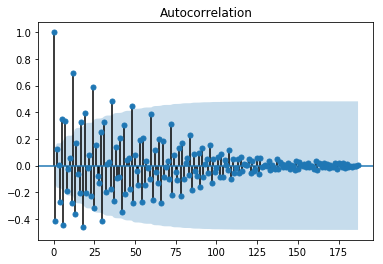

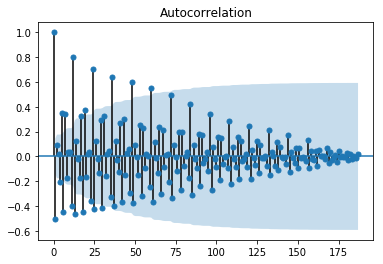

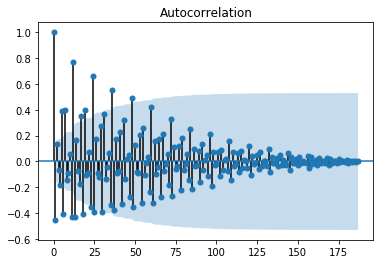

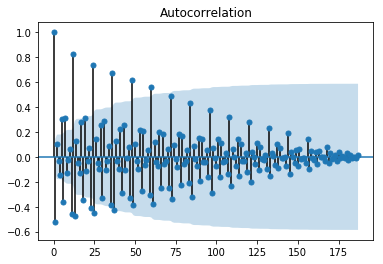

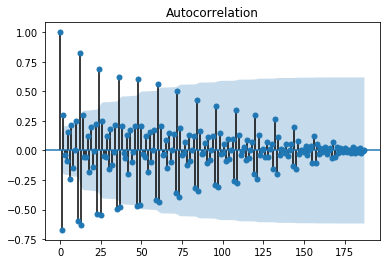

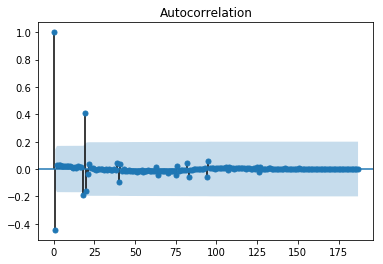

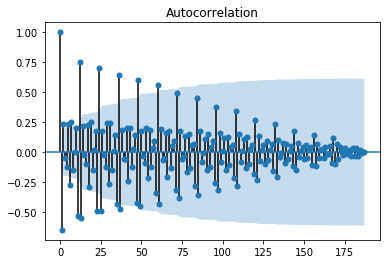

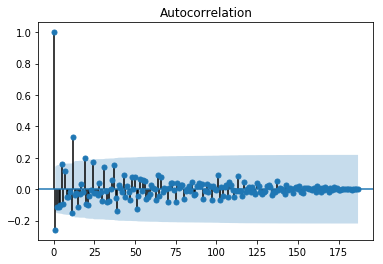

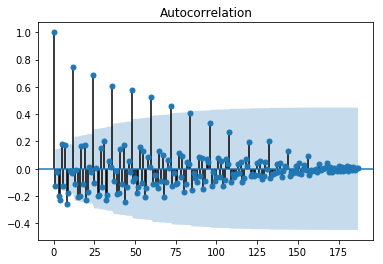

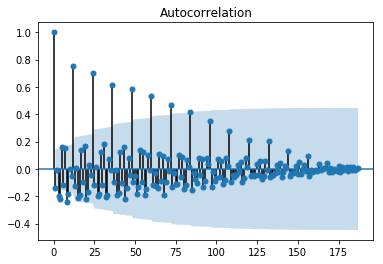

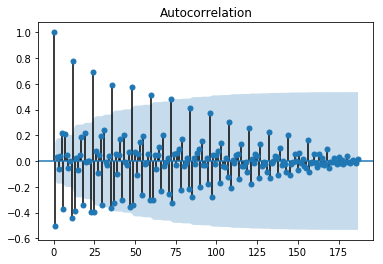

In [194]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

for col in df_new_diffrence.columns:
    fig_first = plot_acf(df_new_diffrence[col].dropna())

In [181]:
df.head()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
0,2017-07-01,20980.32206,23.12607,3.44655,0.0,9653.23988,111.09914,1648.012,4371.98080,5008.53970,...,53.572,3.694,57.266,1051.503,2111.264,17.53,5.424,70676.525,24342.39981,48.016
1,2017-06-01,18260.48619,26.82868,3.31392,0.0,7191.91812,118.54188,959.831,4455.83824,5388.18090,...,47.968,3.560,51.529,834.144,1890.416,17.55,6.162,52936.269,22235.30692,55.518
2,2017-05-01,16878.55820,14.41477,3.32468,0.0,5243.68841,136.91117,840.135,4972.12223,5532.79051,...,47.874,3.679,51.553,697.129,1886.702,15.46,3.572,38705.087,19838.08134,39.540
3,2017-04-01,15436.06640,19.33808,3.53045,0.0,4248.56449,129.62659,1412.868,4397.51087,5155.78836,...,48.577,3.560,52.137,613.895,1914.399,13.12,4.529,30739.269,17875.54180,43.499
4,2017-03-01,16101.84657,27.06185,6.00000,0.0,4816.73759,118.23473,1569.141,4481.18059,5062.00859,...,63.788,3.679,67.466,667.123,2513.842,15.39,6.222,36072.471,19947.97958,55.854


In [182]:
print(df_new_diffrence.shape)
df_new_diffrence.head()

(188, 11)


,Biofuels_Consump_first_diff,Total_Biomass_Consump_first_diff,Bio_Prod_first_diff,BioMass_Prod_Trill_BTU__first_diff,Natural_Gas_Consumed_by_the_Transportation_Sector__Vehicle_Fuel_first_diff,GDP_first_diff,GeoConsump_TrillBtu__first_diff,GenCalifornia_other_thousand_megawatthours_first_diff,Total_Renewable_Consump_TrillBTU__first_diff,Total_RenProd_TrillBtu__first_diff,WasteConsump_TrillBTU__first_diff
Month,,,,,,,,,,,
2016-08-01,10.477,23.473,11.261,23.296,0.119,-5.446448,0.108,-2.30223,30.680,30.503,3.688
2016-07-01,-3.467,-3.334,-2.558,-4.344,0.000,-5.446449,-0.181,3.27264,53.837,52.828,0.403
2016-06-01,-8.870,-15.560,-6.569,-9.170,-0.418,-5.446449,-0.737,-4.20410,-18.237,-11.846,-1.667
2016-05-01,0.657,-1.518,-0.573,-4.454,0.109,-5.446449,1.220,-2.79059,45.063,42.125,0.166
2016-04-01,-19.346,-24.798,-14.129,-21.176,-0.109,-5.446449,-1.445,-10.70980,-15.399,-11.776,0.976


In [183]:
list(df_new_diffrence.columns)

['Biofuels_Consump_first_diff',
 'Total_Biomass_Consump_first_diff',
 'Bio_Prod_first_diff',
 'BioMass_Prod_Trill_BTU__first_diff',
 'Natural_Gas_Consumed_by_the_Transportation_Sector__Vehicle_Fuel_first_diff',
 'GDP_first_diff',
 'GeoConsump_TrillBtu__first_diff',
 'GenCalifornia_other_thousand_megawatthours_first_diff',
 'Total_Renewable_Consump_TrillBTU__first_diff',
 'Total_RenProd_TrillBtu__first_diff',
 'WasteConsump_TrillBTU__first_diff']

In [184]:
df.drop(df.index[[0,1,2,3,4,5,6,7,8,9,10]], inplace=True)
df_new_diffrence.index = df.Month

In [185]:
# split th datframe with all features into test and train

train_all = df_new_diffrence.iloc[66:]
test_all  = df_new_diffrence.iloc[0:66]

In [186]:
# create small datframe from tain and test sets with only one feature each time

features_train = {}

for col in list(train_all.columns):
    s = train_all[col]
    features_train["feature_{0}".format(col)] = s 

features_test = {}

for col in list(test_all.columns):
    s = test_all[col]
    features_test["feature_{0}".format(col)] = s

In [197]:
# train an S-ARIMA model on each small train features dataframe and its predition on the test set in final_result
final_result = {}
for key in features_train.keys(): 
    model = sm.tsa.statespace.SARIMAX(features_train[key],
                                  order=(5,1,5), 
                                  seasonal_order=(0,1,1,12),   
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
    results = model.fit()
    
    prediction =[]
    df = features_test[key]
    for row in range(df.shape[0]):
        pred = results.predict(start = row, end = row, dynamic=True)
        prediction.append(pred[0])
    prediction
    df = pd.DataFrame(df)
    df['prediction'] = prediction
    df[list(df.columns)[0]] = df[list(df.columns)[0]].apply(pd.to_numeric)
    final_result[key] = df

/Users/ahmedissaoui/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ahmedissaoui/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ahmedissaoui/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ahmedissaoui/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ahmedissaoui/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Max

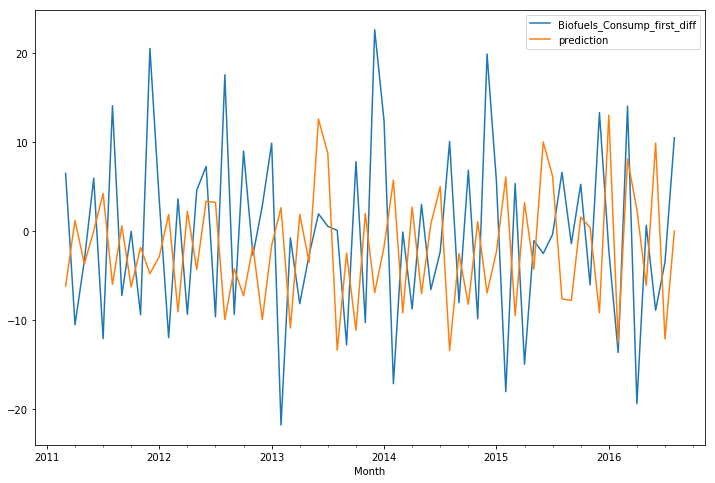

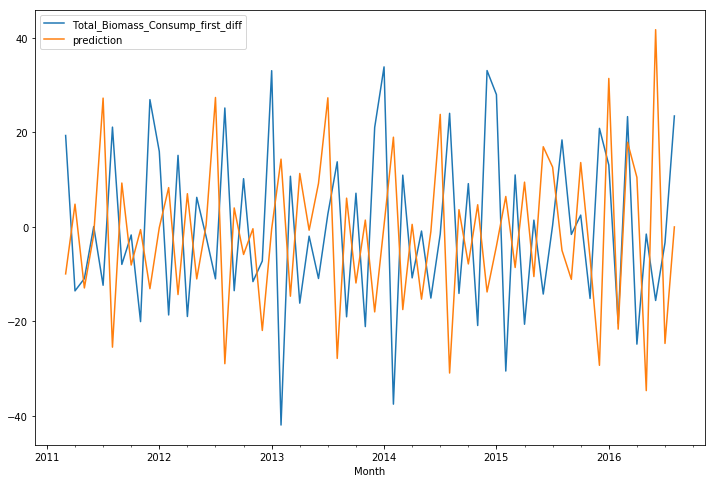

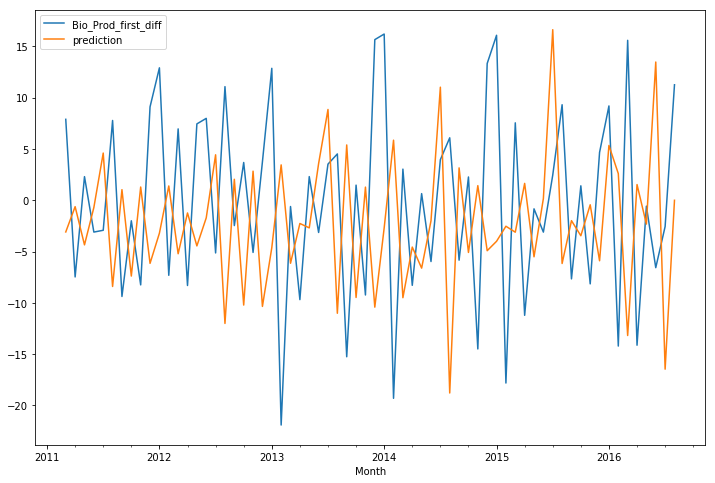

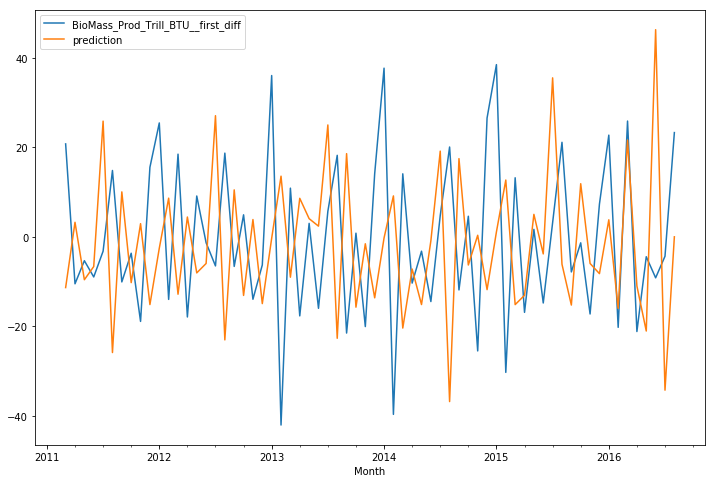

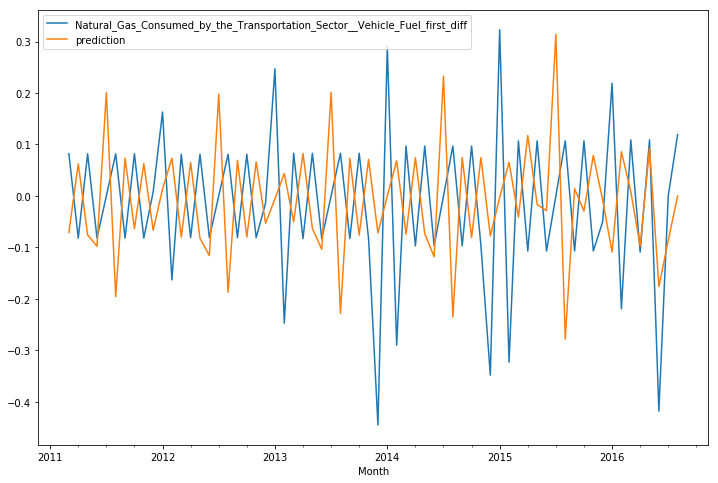

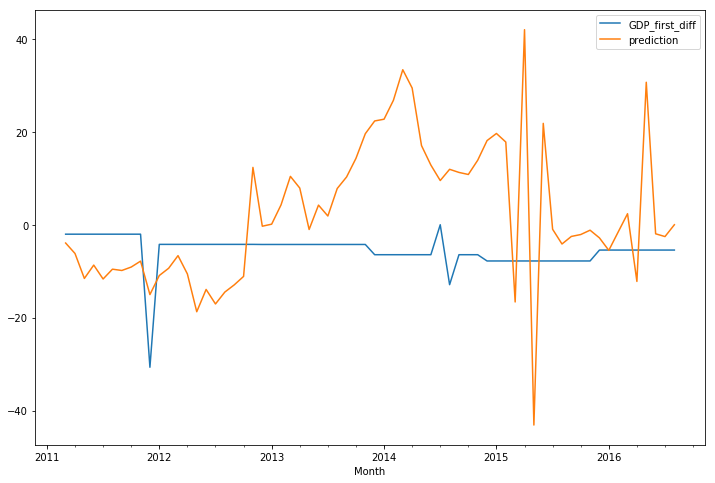

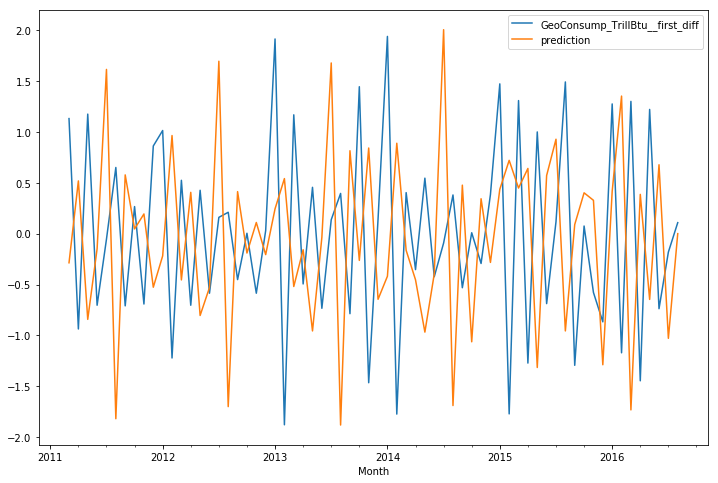

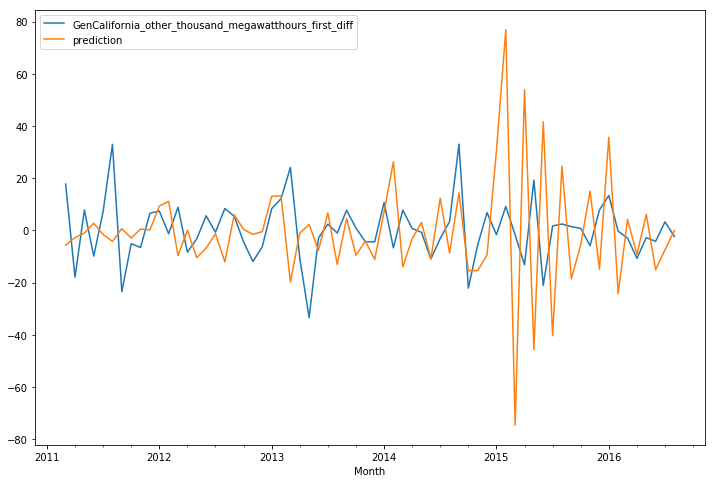

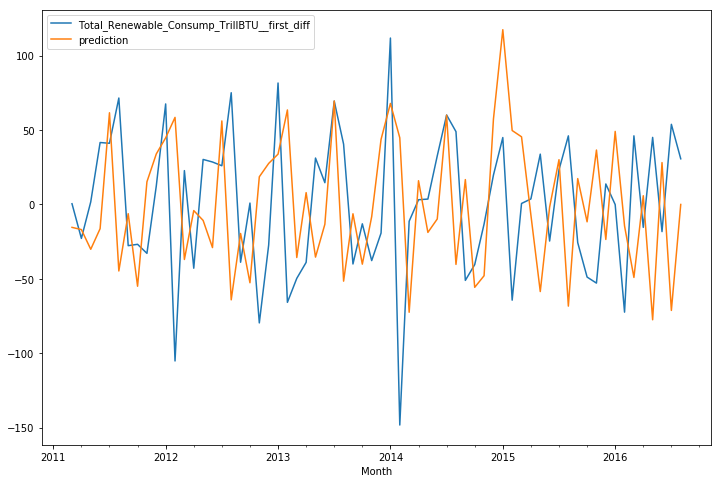

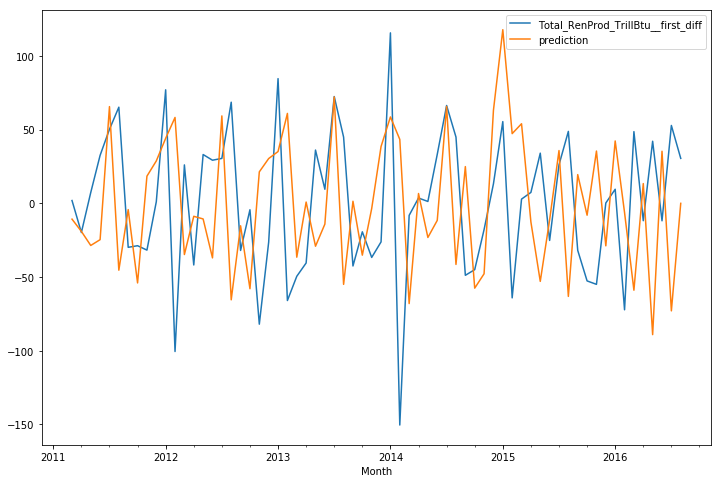

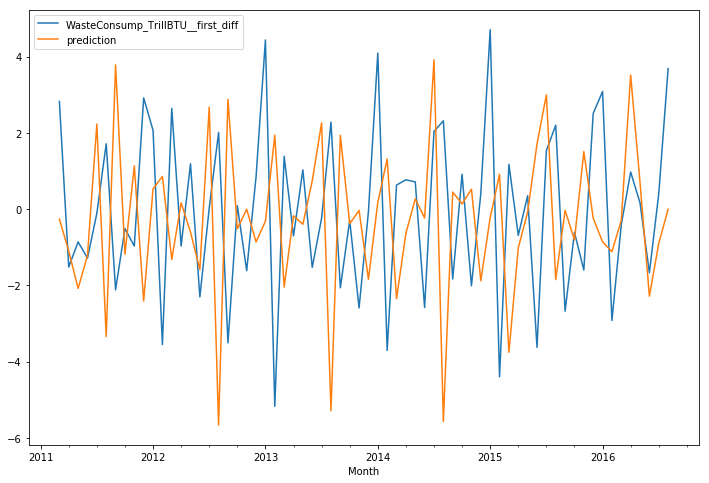

In [198]:
#

for key in final_result.keys():
    df = final_result[key]
#     df.drop(df.index[[66]], inplace=True)
    df[list(df.columns)[0]] = pd.to_numeric(df[list(df.columns)[0]])
    df[list(df.columns)].plot(figsize=(12,8))

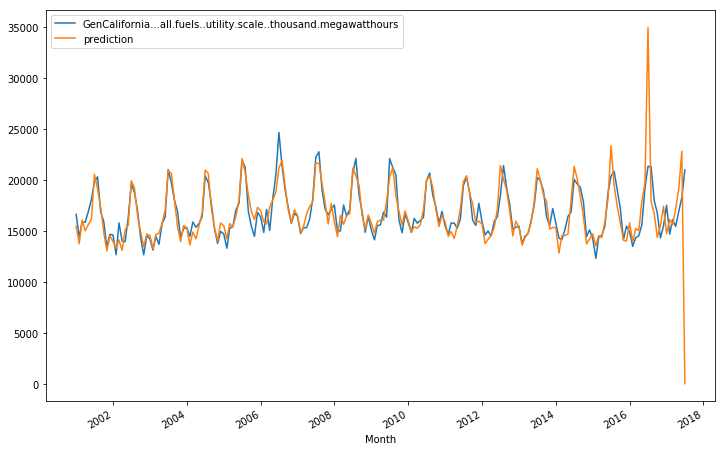

In [148]:
df[['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours','prediction']].plot(figsize=(12,8))


In [90]:
# train an S-ARIMA model on each small train features dataframe and its predition on the test set in final_result
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[1] + DateOffset(months=x) for x in range(0,24)]

final_result = {}
for key in features_train.keys(): 
    model = sm.tsa.statespace.SARIMAX(features_train[key],
                                  order=(1,1,1), 
                                  seasonal_order=(0,1,1,12),   
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
    results = model.fit()
    
    prediction =[]
    df = features_test[key]
    future_dates = [df.index[1] + DateOffset(months=x) for x in range(0,24) ]
    future_df = pd.concat([df,future_dates_df])
    for row in range(df.shape[0]):
        pred = results.predict(start = row, end = row, dynamic=False)
        prediction.append(pred[0])
    prediction
    df = pd.DataFrame(df)
    df['prediction'] = prediction
    df[list(df.columns)[0]] = df[list(df.columns)[0]].apply(pd.to_numeric)
    final_result[key] = df

In [22]:
from pandas.tseries.offsets import DateOffset

In [23]:
future_dates = [df.index[1] + DateOffset(months=x) for x in range(0,24) ]

In [24]:
future_dates

[Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-07-01 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-10-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00')]

In [25]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [26]:

future_df = pd.concat([df,future_dates_df])

In [27]:
future_df.head()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
2017-07-01,2017-07-01,20980.32206,23.12607,3.44655,0.0,9653.23988,111.09914,1648.012,4371.98080,5008.53970,...,53.572,3.694,57.266,1051.503,2111.264,17.53,5.424,70676.525,24342.39981,48.016
2017-06-01,2017-06-01,18260.48619,26.82868,3.31392,0.0,7191.91812,118.54188,959.831,4455.83824,5388.18090,...,47.968,3.560,51.529,834.144,1890.416,17.55,6.162,52936.269,22235.30692,55.518
2017-05-01,2017-05-01,16878.55820,14.41477,3.32468,0.0,5243.68841,136.91117,840.135,4972.12223,5532.79051,...,47.874,3.679,51.553,697.129,1886.702,15.46,3.572,38705.087,19838.08134,39.540
2017-04-01,2017-04-01,15436.06640,19.33808,3.53045,0.0,4248.56449,129.62659,1412.868,4397.51087,5155.78836,...,48.577,3.560,52.137,613.895,1914.399,13.12,4.529,30739.269,17875.54180,43.499
2017-03-01,2017-03-01,16101.84657,27.06185,6.00000,0.0,4816.73759,118.23473,1569.141,4481.18059,5062.00859,...,63.788,3.679,67.466,667.123,2513.842,15.39,6.222,36072.471,19947.97958,55.854


In [28]:
future_df.tail()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
2019-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df = df['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours']

In [38]:
df.head()

Month
2017-07-01    20980.32206
2017-06-01    18260.48619
2017-05-01    16878.55820
2017-04-01    15436.06640
2017-03-01    16101.84657
Name: GenCalifornia...all.fuels..utility.scale..thousand.megawatthours, dtype: float64

In [ ]:
prediction =[]

for i in range(test.shape[0] -1):
    pred = results.predict(start = i, end = i, dynamic=False)
    prediction.append(pred[0])

df = pd.DataFrame(df)
df['prediction'] = prediction
df.head()

In [57]:
df['forecast'] = results.forcast(start = '2015-07-01', end='2017-07-01', dynamic= True)  
df[['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours','forecast']].plot(figsize=(12,8))

AttributeError: 'SARIMAXResults' object has no attribute 'forcast'